https://www.tensorflow.org/tutorials/keras/text_classification

https://www.tensorflow.org/text/guide/word_embeddings

https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

https://pynative.com/python-move-files/

In [1]:
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras import losses

In [2]:
# dataset

url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset_dir = os.path.join(os.getcwd(), 'stackoverflow')

dataset = tf.keras.utils.get_file(dataset_dir, url,
                                    extract=True, cache_dir='.',
                                    cache_subdir='')



6062080/6053168 [==============================] - 0s 0us/step


In [4]:
# had to manually move test and train into stackoverflow folder :|
os.listdir(dataset_dir)

['train', 'test']

In [5]:
train_dir = os.path.join(dataset_dir,'train')
test_dir = os.path.join(dataset_dir, 'test')

In [6]:
class_dirs = os.listdir(train_dir)

In [8]:
import random
for i in range(5):
    random_dir = os.path.join(train_dir,class_dirs[random.randint(0,3)])
    random_file = os.path.join(random_dir, random.choice(os.listdir(random_dir)))
    with open(random_file) as f:
        print(f.read())

how do i fix this program so i can count the number of letters and how do i count words? how do i fix this program so i can count the number of letters and how do i count words?..import collections as c.text = input('enter text').print(len(text)).a = len(text).counts = c.counter(a).print(counts).spaces = counts(' ').print(specific).print(a-spaces).#i want to count the number of letters so i want the amount of characters - the amount of             .#spaces.

"adding results to objects i have a small function which adds a returned result to a list of objects but the problem i have is if there is a certain duplicate it will not allow it - but there are some aspects where duplication occurs and other aspects which do not.....i'll explain better with example:..var data = {""24"":{""16"":[""172""],""15"":[""160""]}}...this list of data translates to :..var data = {""x"":{""y"":[""id""],""y"":[""id""]}};...now im trying to insert new data like this:..    for(var key in result){              

In [9]:
# constants

batch_size = 32
seed = 1357

In [10]:
raw_train_data = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed = seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [11]:
print(raw_train_data)

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [12]:
raw_test_data = tf.keras.utils.text_dataset_from_directory(
    test_dir, 
    batch_size=batch_size
)

Found 8000 files belonging to 4 classes.


In [13]:
raw_val_data = tf.keras.utils.text_dataset_from_directory(
    train_dir, 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)


Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [ ]:
# text preprocessing
# I've noticed: punctuations -- skipping since . ; ? : are parts of language syntax
# no html elements
# text seems already processed ?? 
# no uppercase visible when I run the random cell multiple times
# I want to remove stop words as well --- but im lazy
# if you scroll down you'll see the top words are the stop words

#### time for some theory:

**vectorization** is the conversion of words into integers indexed in a fixed-size vocabulary called features [more here...](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)

**Word embeddings** give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

In [14]:
# vectorization layer initialization

max_features = 8000
sequence_length = 300

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)


In [15]:
# applying vectorization

train_text = raw_train_data.map(lambda x,y: x) # getting text without its labels
vectorize_layer.adapt(train_text) # fitting train_text over the vectorization layer

In [16]:
# exploring vectorized texts:

def vectorize_text(text, label):
  text = tf.expand_dims(text, -1) # (28,28) --> (1,28,28)
  return vectorize_layer(text), label

# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_data))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_data.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))


Review tf.Tensor(b'"reader is not defined [blank] i am computing distance between attributes of different types...in the following code below when i do it for some 5-6 tuples it works fine but when i did it by reading .csv file its creating error...please tell me what is wrong..error:..traceback (most recent call last):.file ""bank.py"", line 91, in &lt;module&gt;.a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q = [dataitem(z) for z in reader].nameerror: name \'reader\' is not defined...i don\'t know why reader got undefined all of sudden.?..i also did quiet research about the object that we create as a file reader represents in this case ""reader"". .what/how is this reader represented?..what i know about objects is that like in oop we create it for a method or class and use it to do operation anywhere in scope and in blank its an object that iterates over the file(external)...what is this reader object, is still questionable to me..does it represent the complete file? .can do a loop

In [17]:
# words from the vocabulary

print(vectorize_layer.get_vocabulary()[:50])
print("1357 ---> ",vectorize_layer.get_vocabulary()[1357])
print("215 ---> ",vectorize_layer.get_vocabulary()[215])
print(f'Vocabulary size: {len(vectorize_layer.get_vocabulary())}')


['', '[UNK]', 'the', 'i', 'to', 'a', 'is', 'in', 'and', 'of', 'if', 'it', 'for', 'this', 'that', 'new', 'blank', 'have', 'string', '0', 'my', 'public', 'not', 'with', 'how', 'return', 'but', '1', 'code', 'int', 'class', 'from', 'an', 'be', 'am', 'can', 'as', 'on', 'function', 'file', 'do', 'get', 'void', 'var', 'want', 'or', 'when', 'using', 'like', 'else']
1357 --->  asks
215 --->  start
Vocabulary size: 8000


# vectorizing the entire datasets

In [18]:
train_ds = raw_train_data.map(vectorize_text)
val_ds = raw_val_data.map(vectorize_text)
test_ds = raw_test_data.map(vectorize_text)

# MODEL

- embedding layer
- dropout - sets some input texts to 0 to avoid overfitting
- global average pooling 1D - The GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible. [read more...](https://www.tensorflow.org/text/guide/word_embeddings#create_a_classification_model)

In [19]:
embedding_dim = 18

In [20]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim), # idk why max_features + 1, alright
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.1),
  layers.Dense(4)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 18)          144018    
                                                                 
 dropout (Dropout)           (None, None, 18)          0         
                                                                 
 global_average_pooling1d (G  (None, 18)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense (Dense)               (None, 4)                 76        
                                                                 
Total params: 144,094
Trainable params: 144,094
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
# training time!

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
200/200 [==============================] - 5s 19ms/step - loss: 1.3779 - accuracy: 0.3572 - val_loss: 1.3657 - val_accuracy: 0.4013
Epoch 2/10
200/200 [==============================] - 4s 17ms/step - loss: 1.3464 - accuracy: 0.4378 - val_loss: 1.3239 - val_accuracy: 0.4650
Epoch 3/10
200/200 [==============================] - 4s 19ms/step - loss: 1.2899 - accuracy: 0.5256 - val_loss: 1.2619 - val_accuracy: 0.5081
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 1.2163 - accuracy: 0.5895 - val_loss: 1.1898 - val_accuracy: 0.5644
Epoch 5/10
200/200 [==============================] - 4s 18ms/step - loss: 1.1351 - accuracy: 0.6353 - val_loss: 1.1191 - val_accuracy: 0.6156
Epoch 6/10
200/200 [==============================] - 4s 17ms/step - loss: 1.0576 - accuracy: 0.6841 - val_loss: 1.0532 - val_accuracy: 0.6725
Epoch 7/10
200/200 [==============================] - 4s 18ms/step - loss: 0.9865 - accuracy: 0.7194 - val_loss: 0.9947 - val_accuracy: 0.6956

### Model evaluation

In [25]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Test Accuracy: ", accuracy)


250/250 [==============================] - 3s 10ms/step - loss: 0.8546 - accuracy: 0.7350
Loss:  0.8545997142791748
Test Accuracy:  0.7350000143051147


In [26]:
loss, accuracy = model.evaluate(val_ds)

print("Loss: ", loss)
print("Validation Accuracy: ", accuracy)


50/50 [==============================] - 1s 9ms/step - loss: 0.8603 - accuracy: 0.7306
Loss:  0.8602501153945923
Validation Accuracy:  0.7306249737739563


## Plots

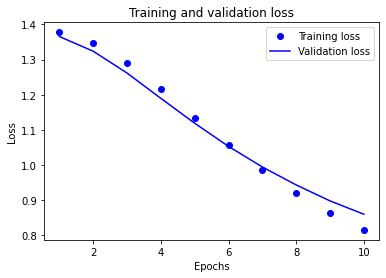

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


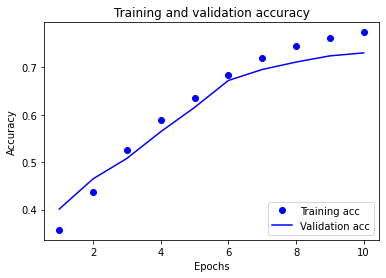

In [29]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Export Model

In [30]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_data)
print(accuracy)


250/250 [==============================] - 3s 12ms/step - loss: 0.8546 - accuracy: 0.7350
0.7350000143051147


In [40]:
# prediction

# labels
# C#: 0
# Java: 1
# Javascript: 2
# Python: 3


examples = [
    "calling arbitrary function with blank 'apply' i want to pass a varying number of argument to varying functions. i set up this basic test:..function overview(arg1, arg2, arg3) {.    console.info('arg1 is ' + arg1);.    console.info('arg2 is ' + arg2);.    console.info('arg3 is ' + arg3);.}..function modules(method, args) {.    this[method].apply(null, args);.}..modules('overview', new array('test1', 'test2'));​...so, i use 'apply' to pass an array with arguments via the 'modules' function to the 'overview' function. this works fine, except for the this[method] part. i read about this in this q&amp;a: calling dynamic function with dynamic parameters in blank and it seems marvelous. however, i keep getting 'typeerror' errors and i can't figure out how to resolve this.  ..of course, i could use a switch within the modules function to call the correct method, but that is unnecessary bulk (hopefully!). i've made a jsfiddle to 'fiddle' with: http://jsfiddle.net/qfprc/. hope anyone can solve and/or explain this."
] # javascript

predictions = export_model.predict(examples)
print(predictions)
print(tf.argmax(predictions, axis=1))
# should return 2 -- javascript

[[0.3279581  0.20556653 0.8195944  0.676149  ]]
tf.Tensor([2], shape=(1,), dtype=int64)
